# Bayesian Rule in the context of a Slot Machine

  $$P(\theta \mid x) = \frac{P(x \mid \theta)P(\theta)}{P(x)}$$

Each pull of a specifc bandit will result in a win with a certain probability. The higher this probability the more likely pulling the arm of the bandit is going to result in a win.

In [1]:
import sys
import numpy as np

import scipy
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
sns.set_style('darkgrid')

## Slot Machines Random Distributive pulls

In [2]:
nb_bandits = 3 
p_bandits = [0.45, 0.55, 0.60]


def pull(n):
    if np.random.rand() < p_bandits[n]:
        return 1
    else:
        return 0

## Visualize Plotted Results

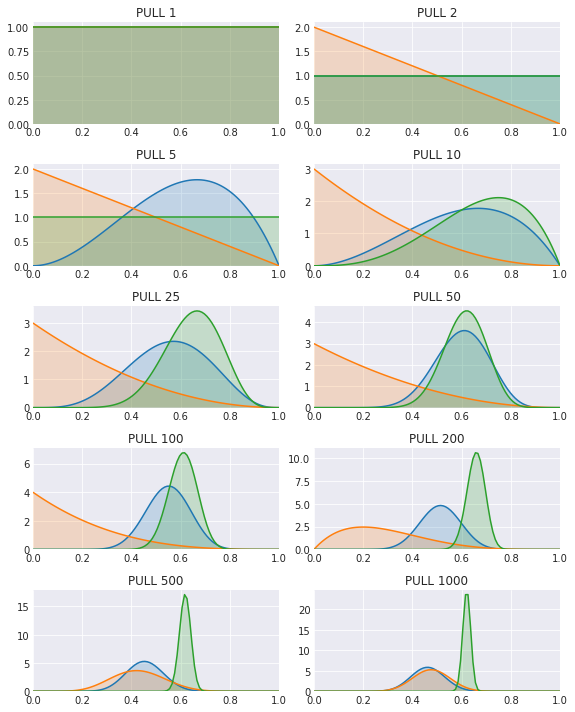

True prob=0.45 Emperical prob=0.47 Trials=52
True prob=0.55 Emperical prob=0.49 Trials=42
True prob=0.60 Emperical prob=0.62 Trials=906


In [6]:
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]
n = 1000
trials = [0, 0, 0]  
wins = [0, 0, 0] 

def plot(priors, step, ax):
    plot_x = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0)
    ax.set_title(f'PULL {step:d}')
    
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat
for step in range(1, n+1):
    bandit_priors = [
        stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, wins)]
    if step in plots:
        plot(bandit_priors, step, next(axs))
    theta_samples = [d.rvs(1) for d in bandit_priors]

    chosen_bandit = np.argmax(theta_samples)
    x = pull(chosen_bandit)
    trials[chosen_bandit] += 1
    wins[chosen_bandit] += x

plt.tight_layout()
plt.show()


emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f} '
           f'Emperical prob={emperical_p_bandits[i]:.2f} '
           f'Trials={trials[i]:d}'))